# M50 Homework 3

## Alex Craig

## Exercise 1.
(Bias and consistency): Let 

$$
X \sim \text{Bernoulli}(q)
$$

and $X_1, ..., X_N$ denote $N$ samples of $X$. For each of the following estimators of $q$, (i) write down the standard error and (ii) state whether they are un-biased and/or consistent. In each case, you can write down an exact formula for the standard error, so you do NOT need to use the CLT.

### Part A
$$
\hat{q}_0 = \frac{1}{N} \sum_{i=1}^N X_i
$$

### Solution
We know that $SE(\hat{q}_0) = \sqrt{Var(\hat{q}_0)}$.

$$
Var(\hat{q}_0) = Var(\frac{1}{N} \sum_{i=1}^N X_i) = \frac{1}{N^2} Var(\sum_{i=1}^N X_i)
$$

Because each $X_i$ is independent, we can write:
$$
Var(\hat{q}_0) = \frac{1}{N^2} \sum_{i=1}^N Var(X_i) = \frac{1}{N^2} \sum_{i=1}^N q(1-q) = \frac{1}{N^2} \times N \times q(1 - q) = \frac{q(1-q)}{N}
$$

$$
\Rightarrow SE(\hat{q}_0) = \sqrt{\frac{q(1-q)}{N}}
$$

Let's check if $\hat{q}_0$ is unbiased:

$$
E(\hat{q}_0) = E(\frac{1}{N} \sum_{i=1}^N X_i) = \frac{1}{N} \sum_{i=1}^N E(X_i) = \frac{1}{N} \times N \times q = q
$$

$$
\Rightarrow \hat{q}_0 \text{ is unbiased}   
$$

Let's check if $\hat{q}_0$ is consistent:

$$
\lim_{N \to \infty} Var(\hat{q}_0) = \lim_{N \to \infty} \frac{q(1-q)}{N} = 0
$$

$$
\text{Variance approaches zero around } E[\hat{q}_0] = q \Rightarrow \hat{q}_0 \text{ is consistent}
$$

### Part B
$$
\hat{q}_1 = \frac{X}{N} + \frac{1}{\sqrt{N}}
$$

### Solution
We know that $SE(\hat{q}_1) = \sqrt{Var(\hat{q}_1)}$.

$$
Var(\hat{q}_0) = Var(\frac{X}{N} + \frac{1}{\sqrt{N}})
$$

$\frac{1}{\sqrt{N}}$ is constant, so $Var(\frac{X}{N} + \frac{1}{\sqrt{N}}) = Var(\frac{X}{N})$.

$$
\Rightarrow Var(\hat{q}_1) = Var(\frac{X}{N}) = \frac{1}{N^2} Var(X) = \frac{1}{N^2} \times q(1 - q) = \frac{q(1-q)}{N^2}
$$

$$
\Rightarrow SE(\hat{q}_1) = \sqrt{\frac{q(1-q)}{N^2}} = \frac{\sqrt{q(1-q)}}{N}
$$

Let's check if $\hat{q}_1$ is unbiased:

$$
E(\hat{q}_1) = E(\frac{X}{N} + \frac{1}{\sqrt{N}}) = \frac{1}{N} E(X) + \frac{1}{\sqrt{N}} = \frac{1}{N} q + \frac{1}{\sqrt{N}} \neq q
$$

$$
\Rightarrow \hat{q}_1 \text{ is biased}
$$


### Part C
$$
\hat{q}_2 = \frac{X}{\lfloor N / 2 \rfloor} + \sum_{i=1}^{\lfloor N / 2 \rfloor} X_i
$$

Note: $\lfloor x \rfloor$ denotes the floor function, which rounds $x$ down to the nearest integer.

### Solution

## Exercise 2. 
(Estimator of mean in exponential model): Let

$$
T \sim exp(\lambda)
$$

Recall that $E[T] = \frac{1}{\lambda}$. We can estimate $E[T]$ via the sample average of measurements $T_1, ..., T_n$:

The suggests that a natural way to estimate $\lambda$ is by:

$$
\hat{\lambda} = \frac{1}{\bar{T}} = \frac{n}{\sum_{i=1}^n T_i}
$$

### Part A
The goal of the first part of this problem is to show, using simulations, that this is in-fact a biased estimator of $\lambda$, although the bias decreases with $n$. To achieve this, you should do the following:
- Make a list of 100 values of $\lambda$ in any range.
- For each value of $\lambda$:
    - Simulate 10000 replicates of an experiment, where each replicate includes $n = 5$ values of $T$.
    - For each of these replicates, compute $\hat{\lambda}$ as defined above.
    - Then estimate the average $E[\hat{\lambda}]$ and save this value is a list.
- Make a plot of $\lambda$ vs. $|E[\hat{\lambda}] - \lambda|$.

### Solution

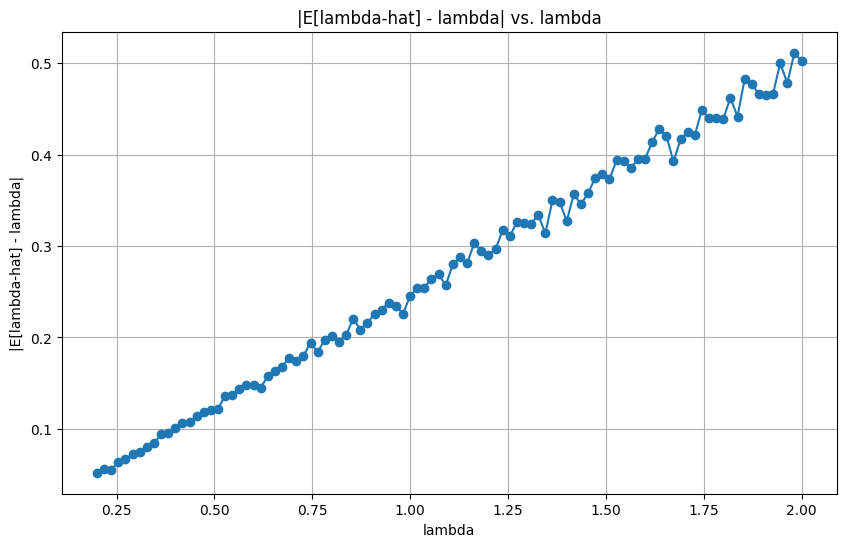

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of lambda values
num_lambdas = 100

# Number of replicates per lambda
num_replicates = 10000

# Create a list of 100 lambda values
lambdas = np.linspace(0.2, 2, num_lambdas)

# Number of T values per replicate
n = 5

# Initialize a list to store the average estimated lambdas
average_estimated_lambdas = []

for l in lambdas:
    # Simulate 10000 replicates of n values of T
    T_values = np.random.exponential(scale=1/l, size=(num_replicates, n))
    
    # Compute lambda hat for each replicate
    lambda_hats = n / np.sum(T_values, axis=1)
    
    # Compute the average of lambda hat and store in the list
    average_estimated_lambdas.append(np.mean(lambda_hats))

# Calculate absolute differences
differences = np.abs(np.array(average_estimated_lambdas) - lambdas)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(lambdas, differences, '-o')
plt.title('|E[lambda-hat] - lambda| vs. lambda')
plt.xlabel('lambda')
plt.ylabel('|E[lambda-hat] - lambda|')
plt.grid(True)
plt.show()

## Exercise 3.
(Earnings data): Consider the earnings data. This can be loaded with

```python
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")
```

In this exercises, you will study the association between earnings and gender. In particular, you will explore how this depends on height. Later we will see there is a better way to answer this question by performing a regression with multiple predictors, but taking this more elementary approach will elucidate some key aspects of regression analysis.

### Part A
What do you expect the association between gender and earnings to be? Where do you expectations come from (news, intuition, other courses you’ve taken)?

### Solution
I expect earnings, given an individual is male, to be higher than earnings, given an individual is female. This comes from the idea of the gender pay gap which states that women on average make about 80% the wages of men. 

### Part B
Using stats models, perform a linear regression on with gender (the column “male”) as the predictor and earnings as the response variable. You can either use “earnk” or “earn”, just keep track of the units. Then answer the questions

1. Is there a statistically significant effect?
2. Is the direction and size of the effect what you expected?

### Solution

In [2]:
import pandas as pd
import statsmodels.api as sm

# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

# Assigning the predictor and the response variable
X = df["male"]
X = sm.add_constant(X) # Adding a constant to the model (intercept)
y = df["earn"]

# Performing the linear regression
model = sm.OLS(y, X).fit()

# Printing the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.24e-40
Time:                        13:01:01   Log-Likelihood:                -20688.
No. Observations:                1816   AIC:                         4.138e+04
Df Residuals:                    1814   BIC:                         4.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.585e+04    635.246     24.948      0.0

1. There does appear to be a statistically significant effect. The p-value is 0.000, and therefore much less than the standard 0.05 threshold.
2. The coefficient for male is approximately `1.426e+04`. This means that, on average, males earn about $14,260 more than females when holding other factors constant. This is a positive value, suggesting that being male is associated with higher earnings, as expected.

### Part C
Using stats models, perform a linear regression with height as the predictor and earnings as the response variable. Answer the same questions which are posed in part (a).

### Solution
I expect earnings, given an individual is taller, to be higher than earnings, given an individual is shorter. This comes from the idea that taller people are more likely to be male, and as we just showed are more likely to earn more.

In [3]:
# Assigning the predictor and the response variable
X_height = df["height"]
X_height = sm.add_constant(X_height)  # Adding a constant to the model (intercept)

# Performing the linear regression
model_height = sm.OLS(y, X_height).fit()

# Printing the summary of the regression
print(model_height.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.42e-32
Time:                        13:01:01   Log-Likelihood:                -20708.
No. Observations:                1816   AIC:                         4.142e+04
Df Residuals:                    1814   BIC:                         4.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.503e+04   8860.650     -9.596      0.0

1. Again, there does appear to be a statistically significant effect. The p-value is 0.000, and therefore much less than the standard 0.05 threshold.

2. The coefficient for height is approximately `1594.9598`. This means that for every one-inch increase in height, earnings increase by about $1,594.96 on average, holding all else constant. This is a positive value, confirming my expectation that taller individuals tend to earn more.

### Part D
You should have found there is an association between both gender and earnings, as well as height and earnings. A natural question is whether the association between height and earnings is simply a byproduct of the fact that men are taller on average. To answer this question, separate the data into males and females, then fit the linear regression model with height as a predictor separately for each group.

### Solution

In [4]:
# Separating the data into males and females
male_data = df[df['male'] == 1]
female_data = df[df['male'] == 0]

# Linear regression for males using height as the predictor
X_male = male_data['height']
X_male = sm.add_constant(X_male)  # Adding a constant to the model (intercept)
y_male = male_data['earn']

model_male = sm.OLS(y_male, X_male).fit()
print("Regression Results for Males:")
print(model_male.summary())

Regression Results for Males:
                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.000
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00834
Time:                        13:01:01   Log-Likelihood:                -7886.0
No. Observations:                 675   AIC:                         1.578e+04
Df Residuals:                     673   BIC:                         1.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          -4e+04 

In [5]:
# Linear regression for females using height as the predictor
X_female = female_data['height']
X_female = sm.add_constant(X_female)  # Adding a constant to the model (intercept)
y_female = female_data['earn']

model_female = sm.OLS(y_female, X_female).fit()
print("Regression Results for Females:")
print(model_female.summary())

Regression Results for Females:
                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.493
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0343
Time:                        13:01:01   Log-Likelihood:                -12626.
No. Observations:                1141   AIC:                         2.526e+04
Df Residuals:                    1139   BIC:                         2.527e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8487.201

### Part E
Based on the results from the previous problem, what do you conclude? Is the association between height and earnings solely due to the association between gender and heights? Do you think it is partially due to the height?

### Solution
We can see that the regression of earnings using height as a predictor in the separate male and female groups is statistically significant, having a p-value of `0.008` for the male group and `0.034` in the female group, which are both less than the standard `0.05` threshold.

The coefficient for height in the male group is approximately `1000.2575`. This means that for every one-inch increase in height, earnings for men increase by about $1,000.26 on average, holding all else constant.

The coefficient for height in the female group is approximately `377.3684`. This means that for every one-inch increase in height, earnings for women increase by about $377.37 on average, holding all else constant.

Both males and females show a positive association between height and earnings. While the association is statistically significant for both genders, the effect size (or magnitude) is larger for males. This suggests that while height does play a role in determining earnings within both genders, other factors, potentially including gender dynamics and societal perceptions, might also contribute to the observed discrepancies in earnings.